In [2]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_d15662382c424fb392e350350f5abbc7 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='D8wmsEInRmGhLw3cIwaUdZALHVZI-PRb_ELibHRT_D0E',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_d15662382c424fb392e350350f5abbc7.get_object(Bucket='finalprojectcoursera-donotdelete-pr-nabcaau098l0pp',Key='loan_train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


#GATHER DATA

#Importing Dataset
dataset = df_data_1
X = dataset.iloc[: , 0:12].values 
y = dataset.iloc[: , 12].values  

X.shape[:]


from sklearn.impute import SimpleImputer

#axis = 0 SimpleImputer along columns
#I, F, K, B, J, C, D
# 1, 2, 3, 5, 8, 9, 10 columns have NaN

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer = imputer.fit(X[: , 1:4])
X[:, 1:4] = imputer.transform(X[:, 1:4])

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer = imputer.fit(X[: , 5:6])
X[:, 5:6] = imputer.transform(X[:, 5:6])

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer = imputer.fit(X[: , 8:11])
X[:, 8:11] = imputer.transform(X[:, 8:11])



#0, 1, 2, 3, 4, 5, 11, 12
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer as mct
#rom sklearn.compose import ColumnTransformer as ct


ct_X = mct((OneHotEncoder(), [0, 1, 2, 3, 4, 5, 11]), remainder='passthrough') 
#This leaves the rest of my columns in place
X = ct_X.fit_transform(X)
X = X.toarray()


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [3]:

#Splitting the Dataset For Training and Testing
#from sklearn.cross_validation import train_test_split
#>>>>ModuleNotFoundError: No module named 'sklearn.cross_validation'
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


#FEATURE SCALING FOR CONTINUOUS VALUES OF INDEPENDENT VARIABLES

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#Only Train is fitted to the algorithm model
X_train = sc.fit_transform(X_train)
#no need to fit the test to the model, just transform it
X_test = sc.transform(X_test)



#PRINCIPAL COMPOUND ALGORITHM FOR EXTRACTION OF FEATURES

#Applying PCA (UnSupervised Extraction)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_varience = pca.explained_variance_ratio_



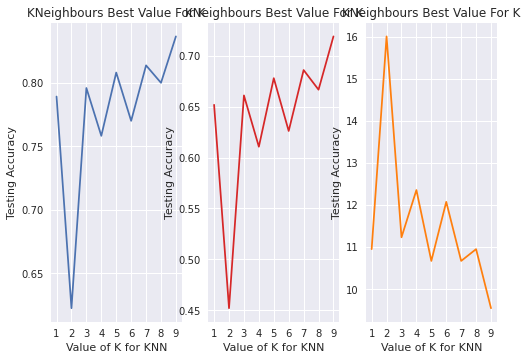

In [4]:


#KNN ALGORITHM FOR BINARY CLASSIFICATION

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score, jaccard_score, log_loss
k_range = range(1, 10)
accuracy_KNN_f1 = []
accuracy_KNN_js = []
accuracy_KNN_log_loss = []
for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors = k)
    KNN.fit(X_train_pca, y_train)
    knn_y = KNN.predict(X_test_pca)
    accuracy_KNN_f1.append(f1_score(y_test, knn_y))
    accuracy_KNN_js.append(jaccard_score(y_test, knn_y))
    accuracy_KNN_log_loss.append(log_loss(y_test, knn_y))


# plot the relationship between # of K and Accuracy

plt.style.use("seaborn")
fig, ax = plt.subplots(1,3)


ax[0].plot(k_range, accuracy_KNN_f1)
ax[0].set_title('KNeighbours Best Value For K')
ax[0].set_xlabel('Value of K for KNN')
ax[0].set_ylabel('Testing Accuracy')
ax[0].set_xticks(range(1,10))


ax[1].plot(k_range, accuracy_KNN_js, 'tab:red')
ax[1].set_title('KNeighbours Best Value For K')
ax[1].set_xlabel('Value of K for KNN')
ax[1].set_ylabel('Testing Accuracy')
ax[1].set_xticks(range(1,10))


ax[2].plot(k_range, accuracy_KNN_log_loss, 'tab:orange')
ax[2].set_title('KNeighbours Best Value For K')
ax[2].set_xlabel('Value of K for KNN')
ax[2].set_ylabel('Testing Accuracy')
ax[2].set_xticks(range(1,10))

plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


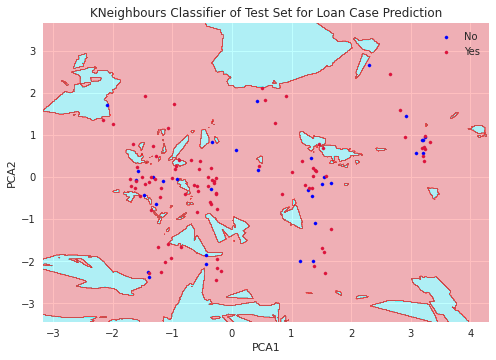

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


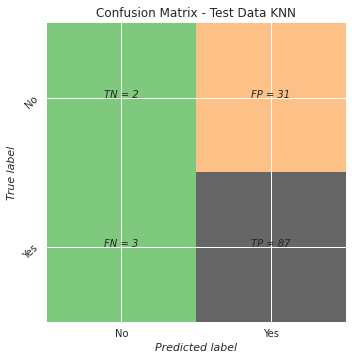

In [5]:

#Fitting Classifier to The Training set 
classifier_KNN = KNeighborsClassifier(n_neighbors = 9,
                                   metric = 'minkowski',
                                   p = 2)
classifier_KNN.fit(X_train_pca, y_train)

#Predicting Result
y_pred_test_KNN = classifier_KNN.predict(X_test_pca)




#Confusion Metrix
from sklearn.metrics import confusion_matrix
cm_KNN = confusion_matrix(y_test, y_pred_test_KNN)

def name1(j):
    if (j==0):
        return "No"
    else:
        return "Yes"

#Visualizing the Test Set
from matplotlib.colors import ListedColormap
X_set_KNN , y_set_KNN = X_test_pca, y_pred_test_KNN
X1 , X2 = np.meshgrid(np.arange(start = X_set_KNN[:, 0].min() - 1,
                                stop = X_set_KNN[:, 0].max() + 1,
                                step = 0.01),
                      np.arange(start = X_set_KNN[:, 1].min() - 1,
                                stop = X_set_KNN[:, 1].max() + 1,
                                step = 0.01))
plt.contourf(X1, X2, classifier_KNN.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('cyan', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i , j in enumerate(np.unique(y_test)):
    plt.scatter(X_set_KNN[y_test == j, 0], X_set_KNN[y_test == j, 1],
                c = ListedColormap(('blue', 'crimson'))(i),
                label = name1(j) , s=10)
    
plt.title('KNeighbours Classifier of Test Set for Loan Case Prediction')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()


#Plot Confusion Matrix KNN
plt.clf()
plt.imshow(cm_KNN, interpolation='nearest', cmap=plt.cm.Accent) #Set2, Spectral, Dark2, Accent, Wislia, RdBu
classNames = ['No','Yes']
plt.title('Confusion Matrix - Test Data KNN', family = 'cursive')
plt.ylabel('True label', style = 'italic')
plt.xlabel('Predicted label', style = 'italic')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames, rotation = 45)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_KNN[i][j]),
                 style = 'italic', family = 'cursive', 
                 horizontalalignment = 'center')
plt.show()


f1score = []
jaccardscore = []
logloss = []



f1score.append(f1_score(y_test, y_pred_test_KNN))
jaccardscore.append(jaccard_score(y_test, y_pred_test_KNN))
logloss.append(log_loss(y_test, y_pred_test_KNN))



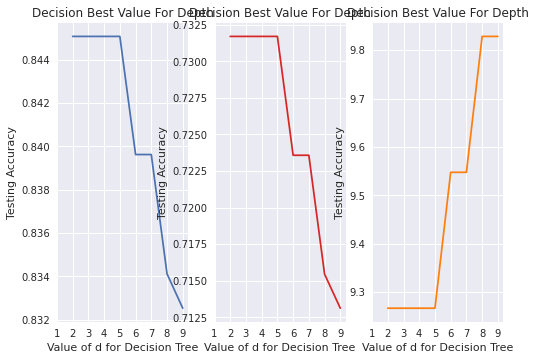

In [6]:


#Decision Tree ALGORITHM FOR BINARY CLASSIFICATION

from sklearn.tree import DecisionTreeClassifier

d_range = range(2, 10)
accuracy_dtree_f1 = []
accuracy_dtree_js = []
accuracy_dtree_log_loss = []
for d in d_range:
    dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = d)
    dtree.fit(X_train_pca, y_train)
    dtree_y = dtree.predict(X_test_pca)
    accuracy_dtree_f1.append(f1_score(y_test, dtree_y))
    accuracy_dtree_js.append(jaccard_score(y_test, dtree_y))
    accuracy_dtree_log_loss.append(log_loss(y_test, dtree_y))


plt.style.use("seaborn")
fig, ax = plt.subplots(1,3)


ax[0].plot(d_range, accuracy_dtree_f1)
ax[0].set_title('Decision Best Value For Depth')
ax[0].set_xlabel('Value of d for Decision Tree')
ax[0].set_ylabel('Testing Accuracy')
ax[0].set_xticks(range(1,10))

ax[1].plot(d_range, accuracy_dtree_js, 'tab:red')
ax[1].set_title('Decision Best Value For Depth')
ax[1].set_xlabel('Value of d for Decision Tree')
ax[1].set_ylabel('Testing Accuracy')
ax[1].set_xticks(range(1,10))


ax[2].plot(d_range, accuracy_dtree_log_loss, 'tab:orange')
ax[2].set_title('Decision Best Value For Depth')
ax[2].set_xlabel('Value of d for Decision Tree')
ax[2].set_ylabel('Testing Accuracy')
ax[2].set_xticks(range(1,10))

plt.show()



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


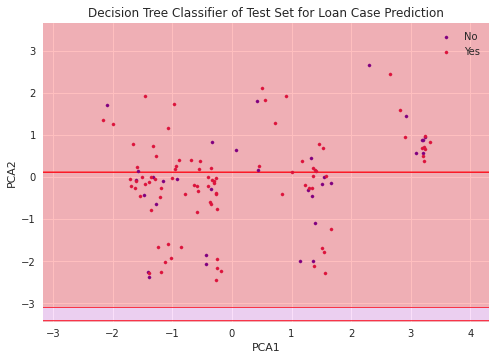

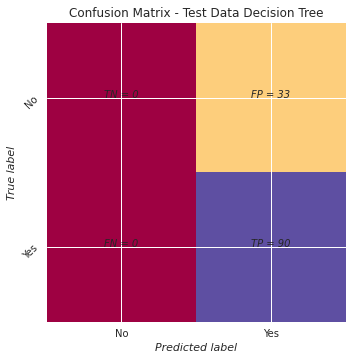

In [7]:


#Fitting Classifier to The Training set 
classifier_dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth= 4)
classifier_dtree.fit(X_train_pca, y_train)

#Predicting Result
y_pred_test_dtree = classifier_dtree.predict(X_test_pca)


#Confusion Metrix
cm_dtree = confusion_matrix(y_test, y_pred_test_dtree)

def name1(j):
    if (j==0):
        return "No"
    else:
        return "Yes"

#Visualizing the Test Set

X_set_dtree , y_set_dtree = X_test_pca, y_pred_test_dtree
X1 , X2 = np.meshgrid(np.arange(start = X_set_dtree[:, 0].min() - 1,
                                stop = X_set_dtree[:, 0].max() + 1,
                                step = 0.01),
                      np.arange(start = X_set_dtree[:, 1].min() - 1,
                                stop = X_set_dtree[:, 1].max() + 1,
                                step = 0.01))
plt.contourf(X1, X2, classifier_dtree.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('violet', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i , j in enumerate(np.unique(y_test)):
    plt.scatter(X_set_dtree[y_test == j, 0], X_set_dtree[y_test == j, 1],
                c = ListedColormap(('purple', 'crimson'))(i),
                label = name1(j) , s=10)
    
plt.title('Decision Tree Classifier of Test Set for Loan Case Prediction')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()


#Plot Confusion Matrix Dtree
plt.clf()
plt.imshow(cm_dtree, interpolation='nearest', cmap=plt.cm.Spectral) #Set2, Spectral, Dark2, Accent, Wislia, RdBu
classNames = ['No','Yes']
plt.title('Confusion Matrix - Test Data Decision Tree', family = 'cursive')
plt.ylabel('True label', style = 'italic')
plt.xlabel('Predicted label', style = 'italic')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames, rotation = 45)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_dtree[i][j]),
                 style = 'italic', family = 'Sans', 
                 horizontalalignment = 'center')
plt.show()



f1score.append(f1_score(y_test, y_pred_test_dtree))
jaccardscore.append(jaccard_score(y_test, y_pred_test_dtree))
logloss.append(log_loss(y_test, y_pred_test_dtree))




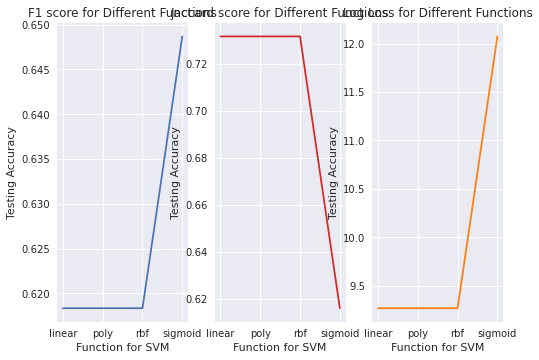

In [8]:


# SVM ALGORITHM FOR BINARY CLASSIFICATION

from sklearn import svm 
accuracy_SVM_f1 = []
accuracy_SVM_js = []
accuracy_SVM_log_loss = []
func = ['linear', 'poly', 'rbf', 'sigmoid']

for f in func:
    SVM = svm.SVC(kernel = f)
    SVM.fit(X_train_pca, y_train)
    SVM_y = SVM.predict(X_test_pca)
    accuracy_SVM_f1.append(f1_score(y_test, SVM_y, average = 'weighted'))
    accuracy_SVM_js.append(jaccard_score(y_test, SVM_y))
    accuracy_SVM_log_loss.append(log_loss(y_test, SVM_y))

plt.style.use("seaborn")
fig, ax = plt.subplots(1,3)

ax[0].plot(func, accuracy_SVM_f1)
ax[0].set_title('F1 score for Different Functions')
ax[0].set_xlabel('Function for SVM')
ax[0].set_ylabel('Testing Accuracy')


ax[1].plot(func, accuracy_SVM_js, 'tab:red')
ax[1].set_title('Jaccard score for Different Functions')
ax[1].set_xlabel('Function for SVM')
ax[1].set_ylabel('Testing Accuracy')



ax[2].plot(func, accuracy_SVM_log_loss, 'tab:orange')
ax[2].set_title('Log Loss for Different Functions')
ax[2].set_xlabel('Function for SVM')
ax[2].set_ylabel('Testing Accuracy')


plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


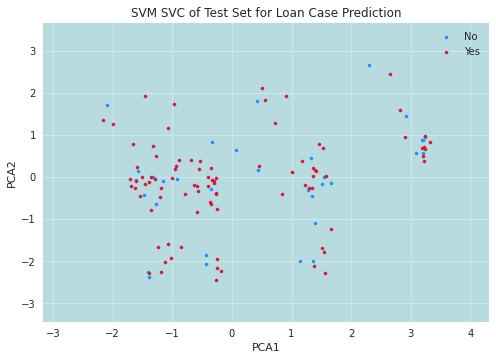

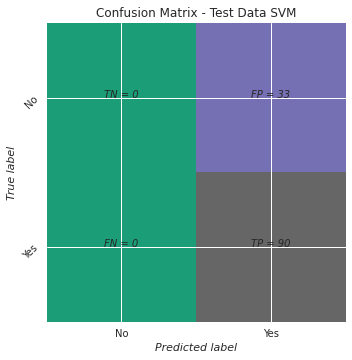

In [9]:

#Fitting Classifier to The Training set 
classifier_SVM = svm.SVC(kernel = 'linear')
classifier_SVM.fit(X_train_pca, y_train)

#Predicting Result
y_pred_test_SVM = classifier_SVM.predict(X_test_pca)


#Confusion Metrix
cm_SVM = confusion_matrix(y_test, y_pred_test_SVM)

def name1(j):
    if (j==0):
        return "No"
    else:
        return "Yes"

#Visualizing the Test Set
from matplotlib.colors import ListedColormap
X_set_SVM , y_set_SVM = X_test_pca, y_pred_test_SVM
X1 , X2 = np.meshgrid(np.arange(start = X_set_SVM[:, 0].min() - 1,
                                stop = X_set_SVM[:, 0].max() + 1,
                                step = 0.01),
                      np.arange(start = X_set_SVM[:, 1].min() - 1,
                                stop = X_set_SVM[:, 1].max() + 1,
                                step = 0.01))
plt.contourf(X1, X2, classifier_SVM.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('lightseagreen', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i , j in enumerate(np.unique(y_test)):
    plt.scatter(X_set_SVM[y_test == j, 0], X_set_SVM[y_test == j, 1],
                c = ListedColormap(('dodgerblue', 'crimson'))(i),
                label = name1(j) , s=10)
    
plt.title('SVM SVC of Test Set for Loan Case Prediction')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()


#Plot Confusion Matrix SVM
plt.clf()
plt.imshow(cm_SVM, interpolation='nearest', cmap=plt.cm.Dark2) #Set2, Spectral, Dark2, Accent, Wislia, RdBu
classNames = ['No','Yes']
plt.title('Confusion Matrix - Test Data SVM', family = 'cursive')
plt.ylabel('True label', style = 'italic')
plt.xlabel('Predicted label', style = 'italic')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames, rotation = 45)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_SVM[i][j]),
                 style = 'italic', family = 'Sans', 
                 horizontalalignment = 'center')
plt.show()


In [10]:

f1score.append(f1_score(y_test, y_pred_test_SVM))
jaccardscore.append(jaccard_score(y_test, y_pred_test_SVM))
logloss.append(log_loss(y_test, y_pred_test_SVM))




*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


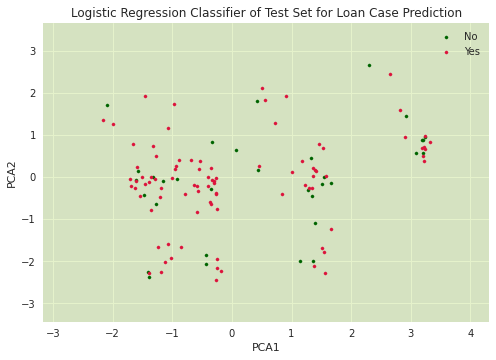

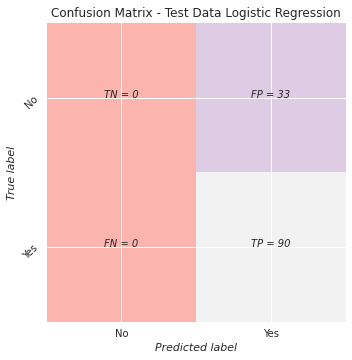

In [11]:



#Logistic Regression ALGORITHM FOR BINARY CLASSIFICATION

from sklearn.linear_model import LogisticRegression

#Fitting Classifier to The Training set 
classifier_log = LogisticRegression(random_state = 0)
classifier_log.fit(X_train_pca, y_train)

#Predicting Result
y_pred_test_log = classifier_log.predict(X_test_pca)


#Confusion Metrix
cm_log = confusion_matrix(y_test, y_pred_test_log)

def name1(j):
    if (j==0):
        return "No"
    else:
        return "Yes"

#Visualizing the Test Set 
X_set_log , y_set_log = X_test_pca, y_pred_test_log
X1 , X2 = np.meshgrid(np.arange(start = X_set_log[:, 0].min() - 1,
                                stop = X_set_log[:, 0].max() + 1,
                                step = 0.01),
                      np.arange(start = X_set_log[:, 1].min() - 1,
                                stop = X_set_log[:, 1].max() + 1,
                                step = 0.01))
plt.contourf(X1, X2, classifier_log.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('yellowgreen', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i , j in enumerate(np.unique(y_test)):
    plt.scatter(X_set_log[y_test == j, 0], X_set_log[y_test == j, 1],
                c = ListedColormap(('darkgreen', 'crimson'))(i),
                label = name1(j) , s=10)
    
plt.title('Logistic Regression Classifier of Test Set for Loan Case Prediction')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()


#Plot Confusion Matrix Logistic Regression
plt.clf()
plt.imshow(cm_log, interpolation='nearest', cmap=plt.cm.Pastel1) #Pastel2, Spectral, Dark2, Accent, Wislia, RdBu
classNames = ['No','Yes']
plt.title('Confusion Matrix - Test Data Logistic Regression', family = 'cursive')
plt.ylabel('True label', style = 'italic')
plt.xlabel('Predicted label', style = 'italic')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames, rotation = 45)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_log[i][j]),
                 style = 'italic', family = 'Sans', 
                 horizontalalignment = 'center')
plt.show()




In [12]:


f1score.append(f1_score(y_test, y_pred_test_log))
jaccardscore.append(jaccard_score(y_test, y_pred_test_log))
logloss.append(log_loss(y_test, y_pred_test_log))


In [13]:

#Making Metrics DataFrame  
Metrics = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
MetricsList = [Metrics, f1score, jaccardscore, logloss]
MetricsDF = pd.DataFrame(MetricsList).T
MetricsDF.columns = ['Models', 'f1 Score', 'Jaccard Score', 'Log Loss']

print (MetricsDF)


                Models  f1 Score Jaccard Score Log Loss
0                  KNN  0.836538      0.719008  9.54751
1        Decision Tree   0.84507      0.731707  9.26672
2                  SVM   0.84507      0.731707  9.26672
3  Logistic Regression   0.84507      0.731707  9.26672
